In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('updated_pollution_dataset.csv')

In [6]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [8]:
air_quality_map = {'Hazardous' : 0, 'Poor' : 1, 'Moderate': 2, 'Good' : 3 }
df['Air Quality'] = df['Air Quality'].map(air_quality_map)

In [10]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,3
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,3


In [12]:
from sklearn.model_selection import train_test_split

Accuracy of Random Forest Classifier: 0.9610

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       111
           1       0.88      0.91      0.90       186
           2       0.97      0.97      0.97       294
           3       1.00      1.00      1.00       409

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



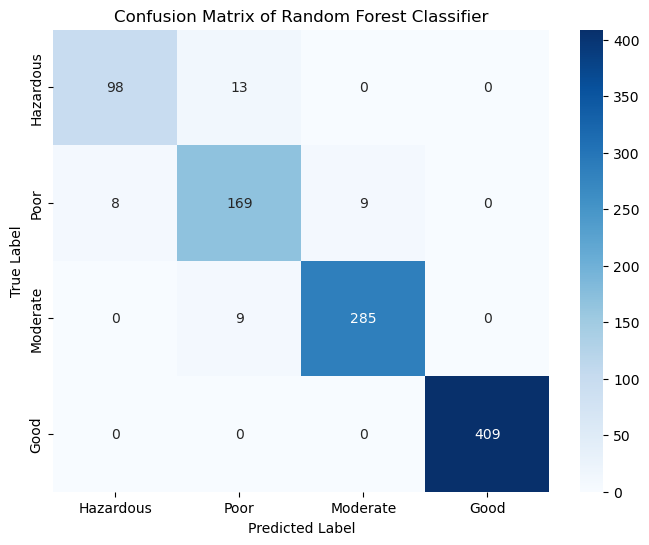

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming df is already defined with the 'Air Quality' column

# Split the dataset
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.4f}")

# Classification Report
print("\nClassification Report of Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of Random Forest Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save and Show Plot
plt.savefig('RandomForest.png')
plt.show()


Accuracy of Gradient Boosting Classifier: 0.9550

Classification Report of Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       111
           1       0.88      0.90      0.89       186
           2       0.97      0.96      0.96       294
           3       0.99      1.00      1.00       409

    accuracy                           0.95      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.96      0.95      0.95      1000



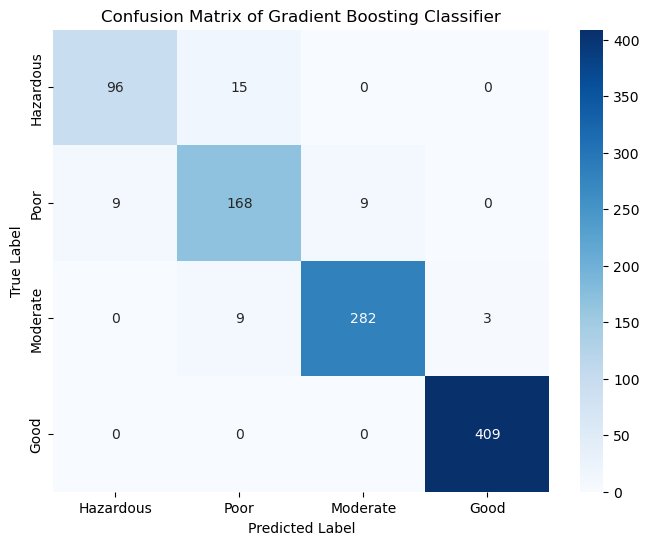

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming df is already defined with the 'Air Quality' column

# Split the dataset
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm_model.predict(X_test)

# Accuracy
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"Accuracy of Gradient Boosting Classifier: {accuracy_gbm:.4f}")

# Classification Report
print("\nClassification Report of Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gbm))

# Confusion Matrix
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save and Show Plot
plt.savefig('GBM.png')
plt.show()


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoost Classifier: 0.8590

Classification Report of AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       111
           1       0.62      0.70      0.66       186
           2       0.92      0.81      0.86       294
           3       0.99      1.00      0.99       409

    accuracy                           0.86      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.87      0.86      0.86      1000



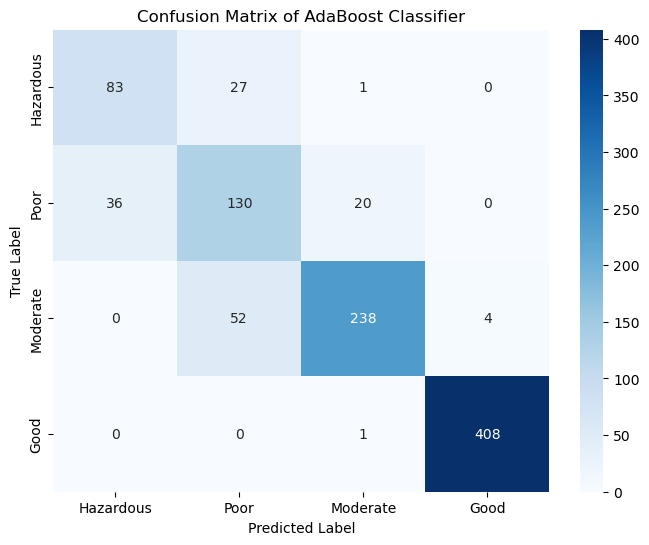

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming df is already defined with the 'Air Quality' column

# Split the dataset
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Predictions
y_pred_ada = ada_model.predict(X_test)

# Accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy of AdaBoost Classifier: {accuracy_ada:.4f}")

# Classification Report
print("\nClassification Report of AdaBoost Classifier:")
print(classification_report(y_test, y_pred_ada))

# Confusion Matrix
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save and Show Plot
plt.savefig('AdaBoost.png')
plt.show()


Accuracy of Passive Aggressive Classifier: 0.5170

Classification Report of Passive Aggressive Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       111
           1       0.28      0.99      0.44       186
           2       0.00      0.00      0.00       294
           3       0.98      0.81      0.89       409

    accuracy                           0.52      1000
   macro avg       0.31      0.45      0.33      1000
weighted avg       0.45      0.52      0.44      1000



C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


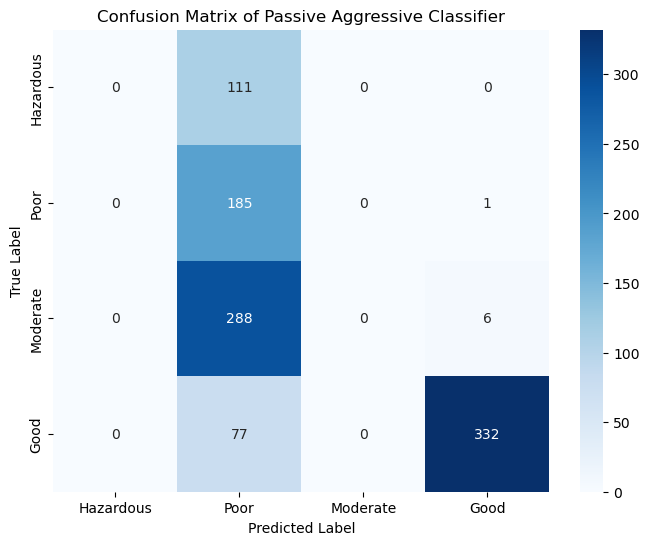

In [20]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming df is already defined with the 'Air Quality' column

# Split the dataset
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Passive Aggressive Classifier
pa_model = PassiveAggressiveClassifier(random_state=42)
pa_model.fit(X_train, y_train)

# Predictions
y_pred_pa = pa_model.predict(X_test)

# Accuracy
accuracy_pa = accuracy_score(y_test, y_pred_pa)
print(f"Accuracy of Passive Aggressive Classifier: {accuracy_pa:.4f}")

# Classification Report
print("\nClassification Report of Passive Aggressive Classifier:")
print(classification_report(y_test, y_pred_pa))

# Confusion Matrix
conf_matrix_pa = confusion_matrix(y_test, y_pred_pa)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pa, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'], 
            yticklabels=['Hazardous', 'Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix of Passive Aggressive Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save and Show Plot
plt.savefig('PassiveAggressive.png')
plt.show()
